In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
# Read the dataset
bd = pd.read_csv("C:/Data_Science/Prodigy_Tasks/data-science-datasets/Task 3/bank/bank-full.csv", sep=';', quotechar='"')

# Basic Exploration

In [3]:
bd.shape

(45211, 17)

In [4]:
bd.duplicated().sum()

0

In [5]:
bd.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bd.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [8]:
numeric_bd = bd.select_dtypes(include=['float64', 'int64'])

In [9]:
categorical_bd = bd.select_dtypes(exclude=['float64', 'int64'])

In [10]:
bd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
bd.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
bd.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


# Exploratory Data Analysis

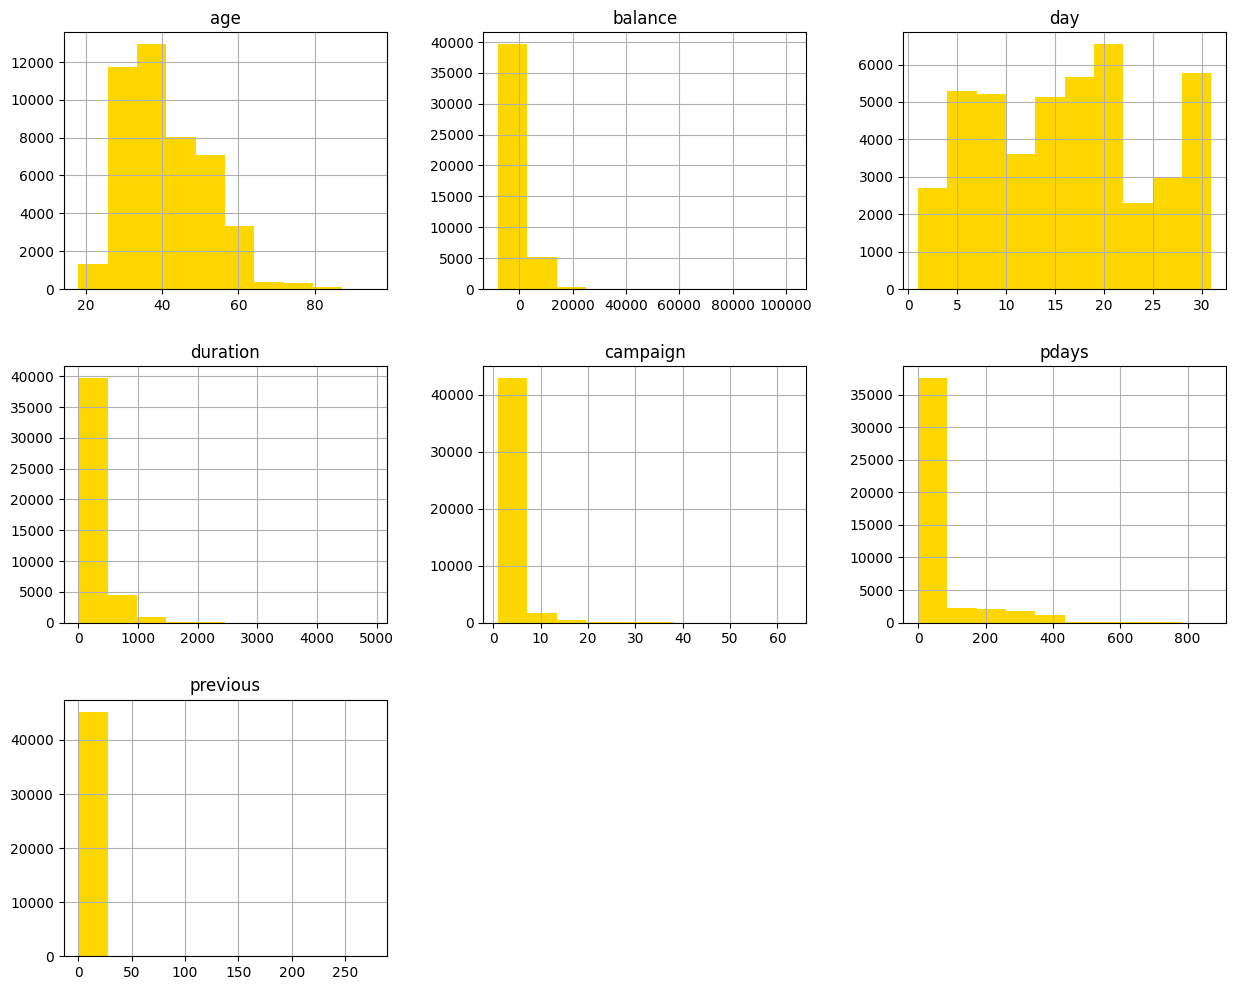

In [13]:
# Numeric Distributions
bd.hist(figsize=(15,12),color='gold')
plt.show() 

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


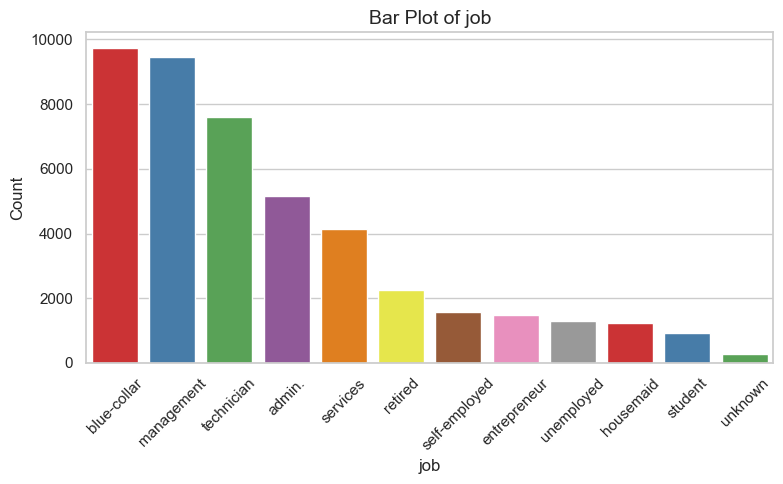

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


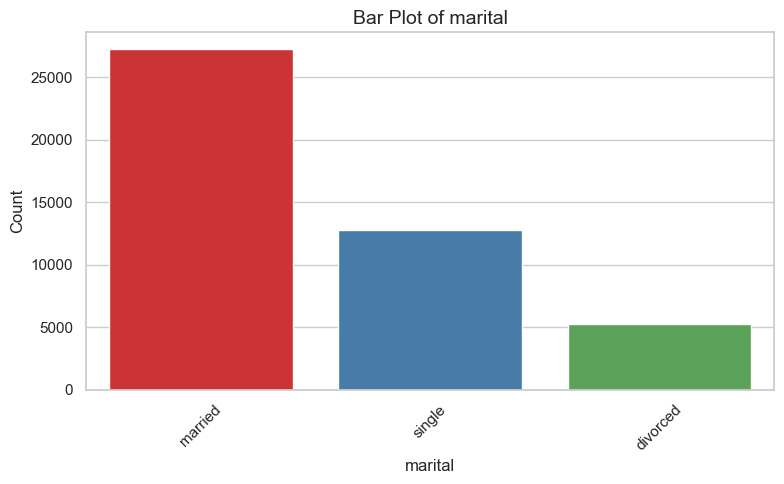

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


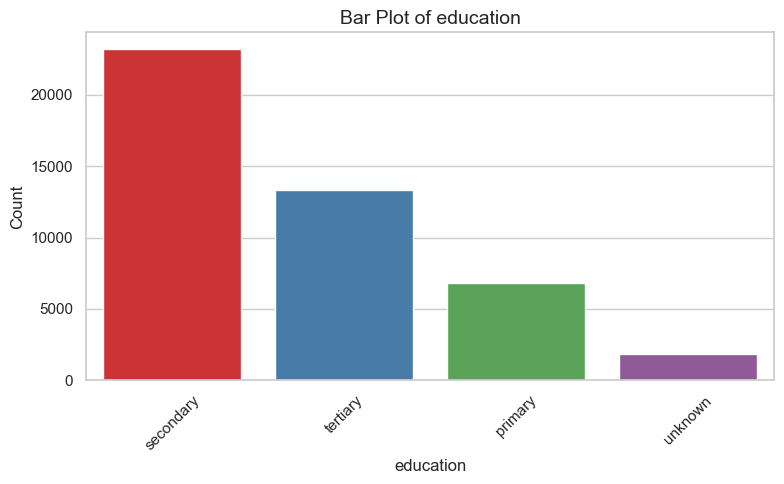

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


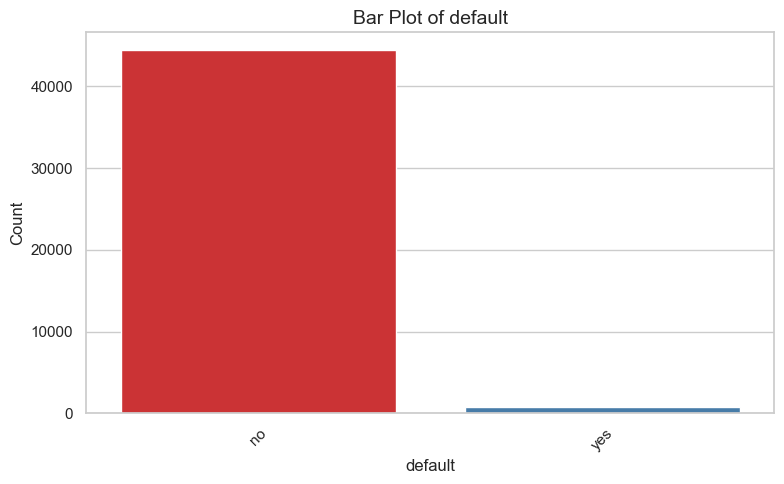

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


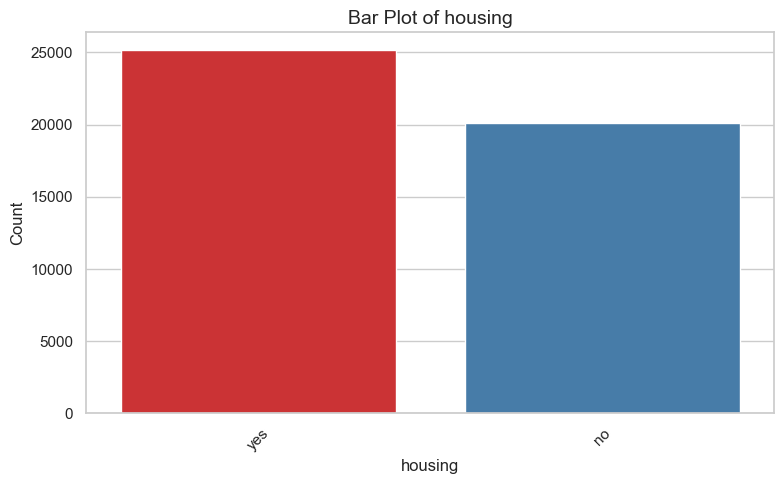

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


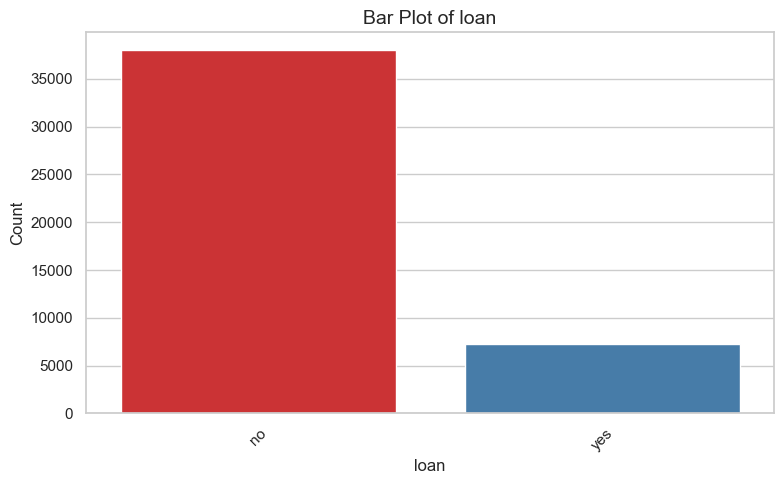

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


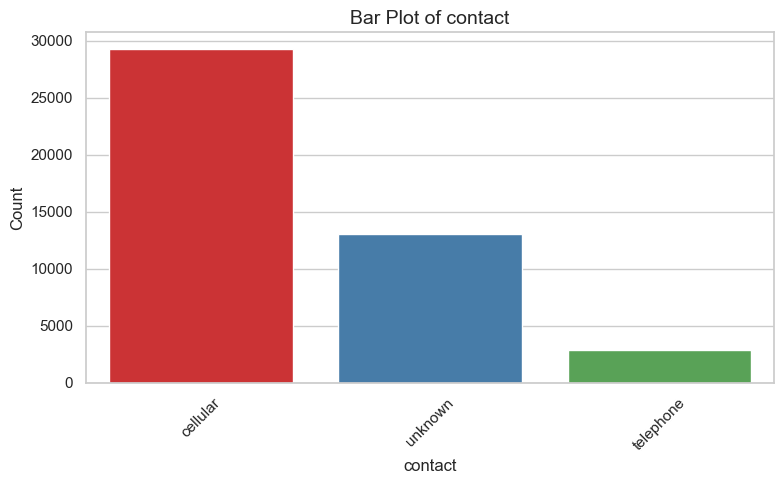

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


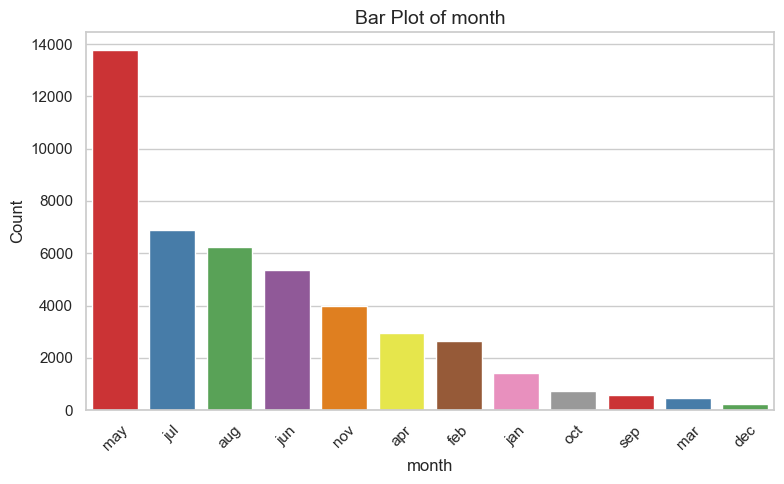

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


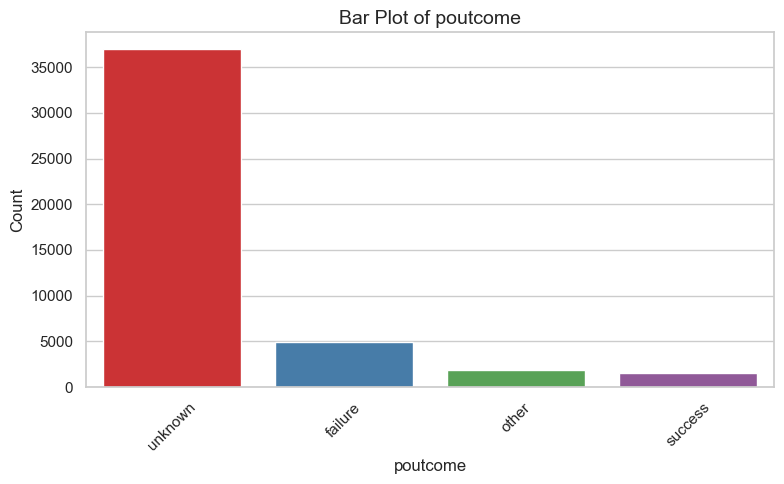

C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\1646360493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)


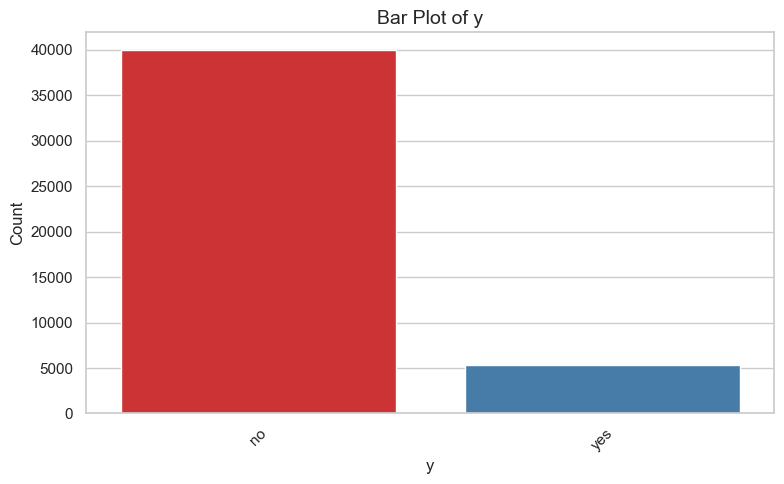

In [14]:
# Categorical Distributions
sns.set(style="whitegrid")
for col in categorical_bd.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=categorical_bd, x=col, palette="Set1", order=categorical_bd[col].value_counts().index)
    plt.title(f"Bar Plot of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
Corr = bd.corr
print(Corr)

<bound method DataFrame.corr of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

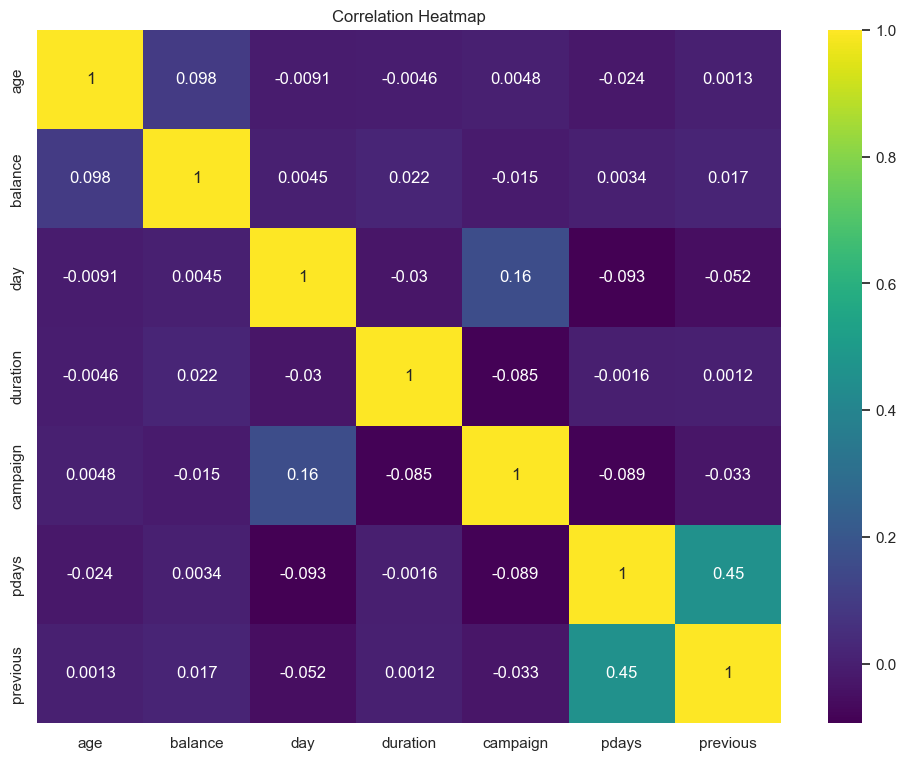

In [16]:
# Correlation Heatmap (only numeric columns)
plt.figure(figsize=(12,9))
sns.heatmap(numeric_bd.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

# Outlier Detection and Treatment

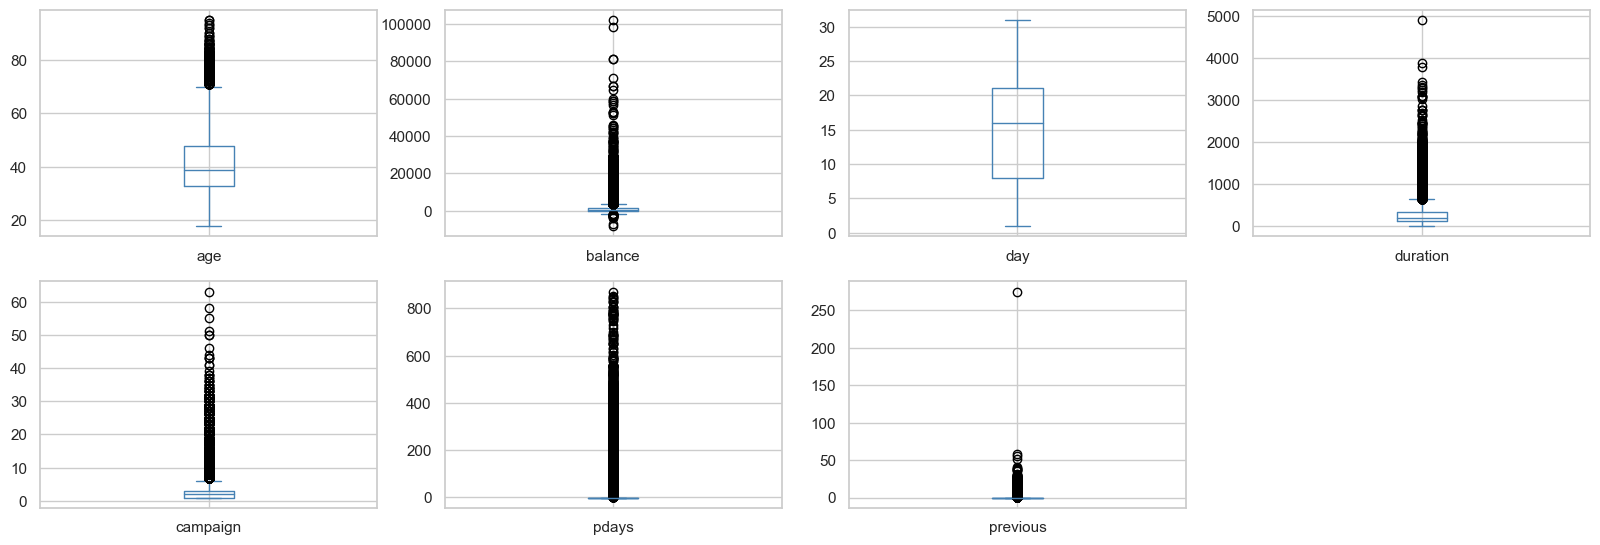

In [17]:
# Check for Outlier
bd.plot(kind = 'box',subplots = True, layout = (3,4),figsize = (20,10),color = 'steelblue')
plt.show()

In [18]:
# Outlier Treatment
columns = ['age','campaign','duration']
for column in columns:
    q1 = np.percentile(bd[column],25)
    q3 = np.percentile(bd[column],75)
    iqr = q3 - q1
    lower_bound = q1-1.5 * iqr
    upper_bound = q3+1.5 * iqr
    bd = bd[(bd[column] >= lower_bound) & (bd[column] <= upper_bound)]

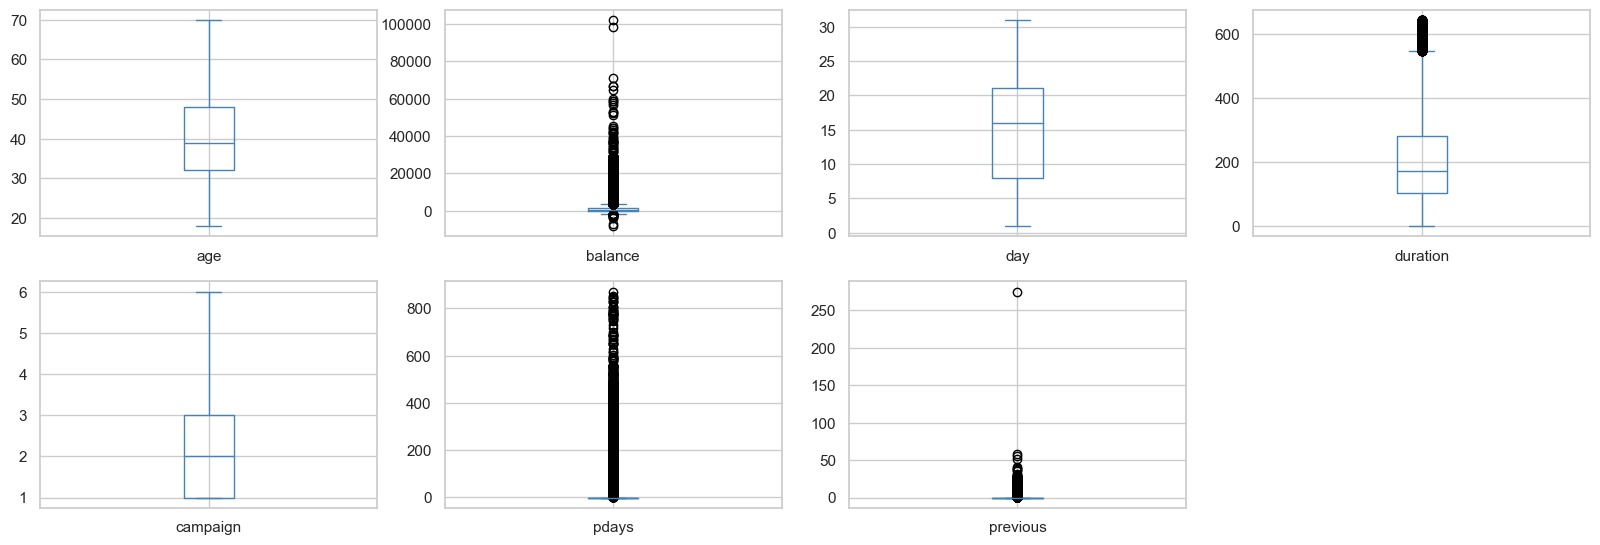

In [19]:
# ---- Boxplot after treatment
bd.plot(kind = 'box',subplots = True, layout = (3,4),figsize = (20,10),color = 'steelblue')
plt.show()

In [20]:
print(bd.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


# Preprocessing

In [21]:
# Label Encoding for binary columns
bd_encoded = bd.copy()
binary_cols = ['default', 'housing', 'loan', 'y']
le = LabelEncoder()
for col in binary_cols:
    bd_encoded[col] = le.fit_transform(bd_encoded[col])  # yes=1, no=0
print(bd_encoded[binary_cols].head())    

   default  housing  loan  y
0        0        1     0  0
1        0        1     0  0
2        0        1     1  0
3        0        1     0  0
4        0        0     0  0


In [22]:
# One-hot encode other categorical variables
bd_encoded = pd.get_dummies(
    bd_encoded,
    columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'],
    drop_first=True
)

In [23]:
bd_encoded.shape

(38690, 43)

In [24]:
bd_encoded.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [25]:
bd_encoded['y'].value_counts(normalize=True)*100

y
0    91.240631
1     8.759369
Name: proportion, dtype: float64

In [26]:
# Train-Test Split
X = bd_encoded.drop('y', axis=1)
y = bd_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27083, 42)
(11607, 42)
(27083,)
(11607,)


# Model Building

In [28]:
# Evaluate the model on test
clf = DecisionTreeClassifier(
    max_depth=6,  # SIMPLIFIED TREE
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
#y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925045231325924
Confusion Matrix:
 [[10420   174]
 [  696   317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     10594
           1       0.65      0.31      0.42      1013

    accuracy                           0.93     11607
   macro avg       0.79      0.65      0.69     11607
weighted avg       0.91      0.93      0.91     11607



In [30]:
#Trainig and Testing Accuracy
print('Training Accuracy:',clf.score(X_train,y_train))
print('Testing Accuracy:',clf.score(X_test,y_test))

Training Accuracy: 0.9292545139017095
Testing Accuracy: 0.925045231325924


# SMOTE (Synthetic Minority Over-sampling Technique) used for Imbalanced data- detects minority class and improve performance.

In [31]:
# Evaluate the model using Smote
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [32]:
clf = DecisionTreeClassifier(
    max_depth=6,  # SIMPLIFIED TREE
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42
)
clf.fit(X_train_sm, y_train_sm)
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy(SMOTE):", accuracy_score(y_test, y_pred))
print("Confusion Matrix(SMOTE):\n", confusion_matrix(y_test, y_pred))
print("Classification Report(SMOTE):\n", classification_report(y_test, y_pred))

Accuracy: 0.8813646937193074
Confusion Matrix:
 [[9640  954]
 [ 423  590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     10594
           1       0.38      0.58      0.46      1013

    accuracy                           0.88     11607
   macro avg       0.67      0.75      0.70     11607
weighted avg       0.91      0.88      0.89     11607



In [34]:
#Trainig and Testing Accuracy using smote
print('Training Accuracy:',clf.score(X_train_sm,y_train_sm))
print('Testing Accuracy:',clf.score(X_test,y_test))

Training Accuracy: 0.8951511717327073
Testing Accuracy: 0.8813646937193074


C:\Users\Spring 2\AppData\Local\Temp\ipykernel_16112\459137590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='plasma')


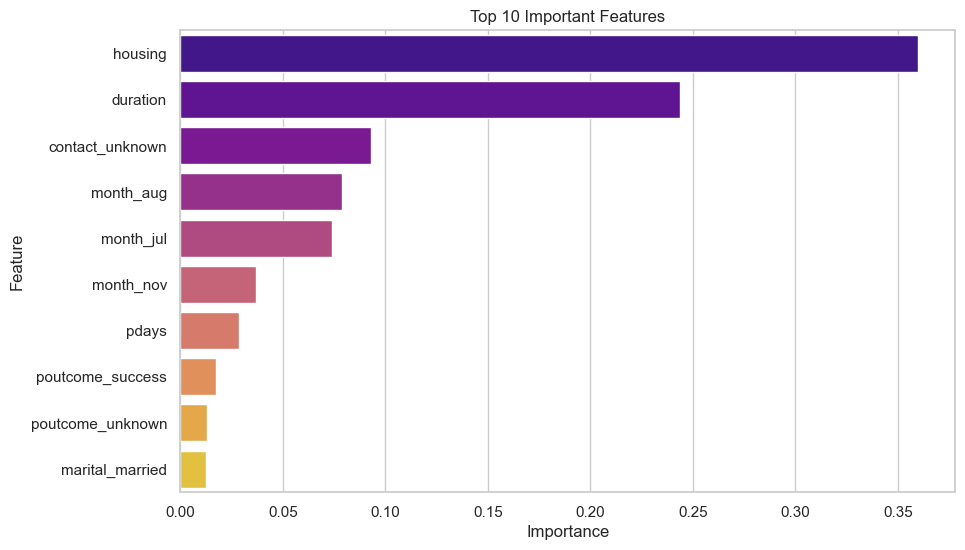

In [37]:
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='plasma')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()    #---------1.housing – Loan status has the highest influence, indicating customers with certain financial commitments behave differently in subscription decisions. 2.duration – Longer last contact calls correlate strongly with higher subscription rates.


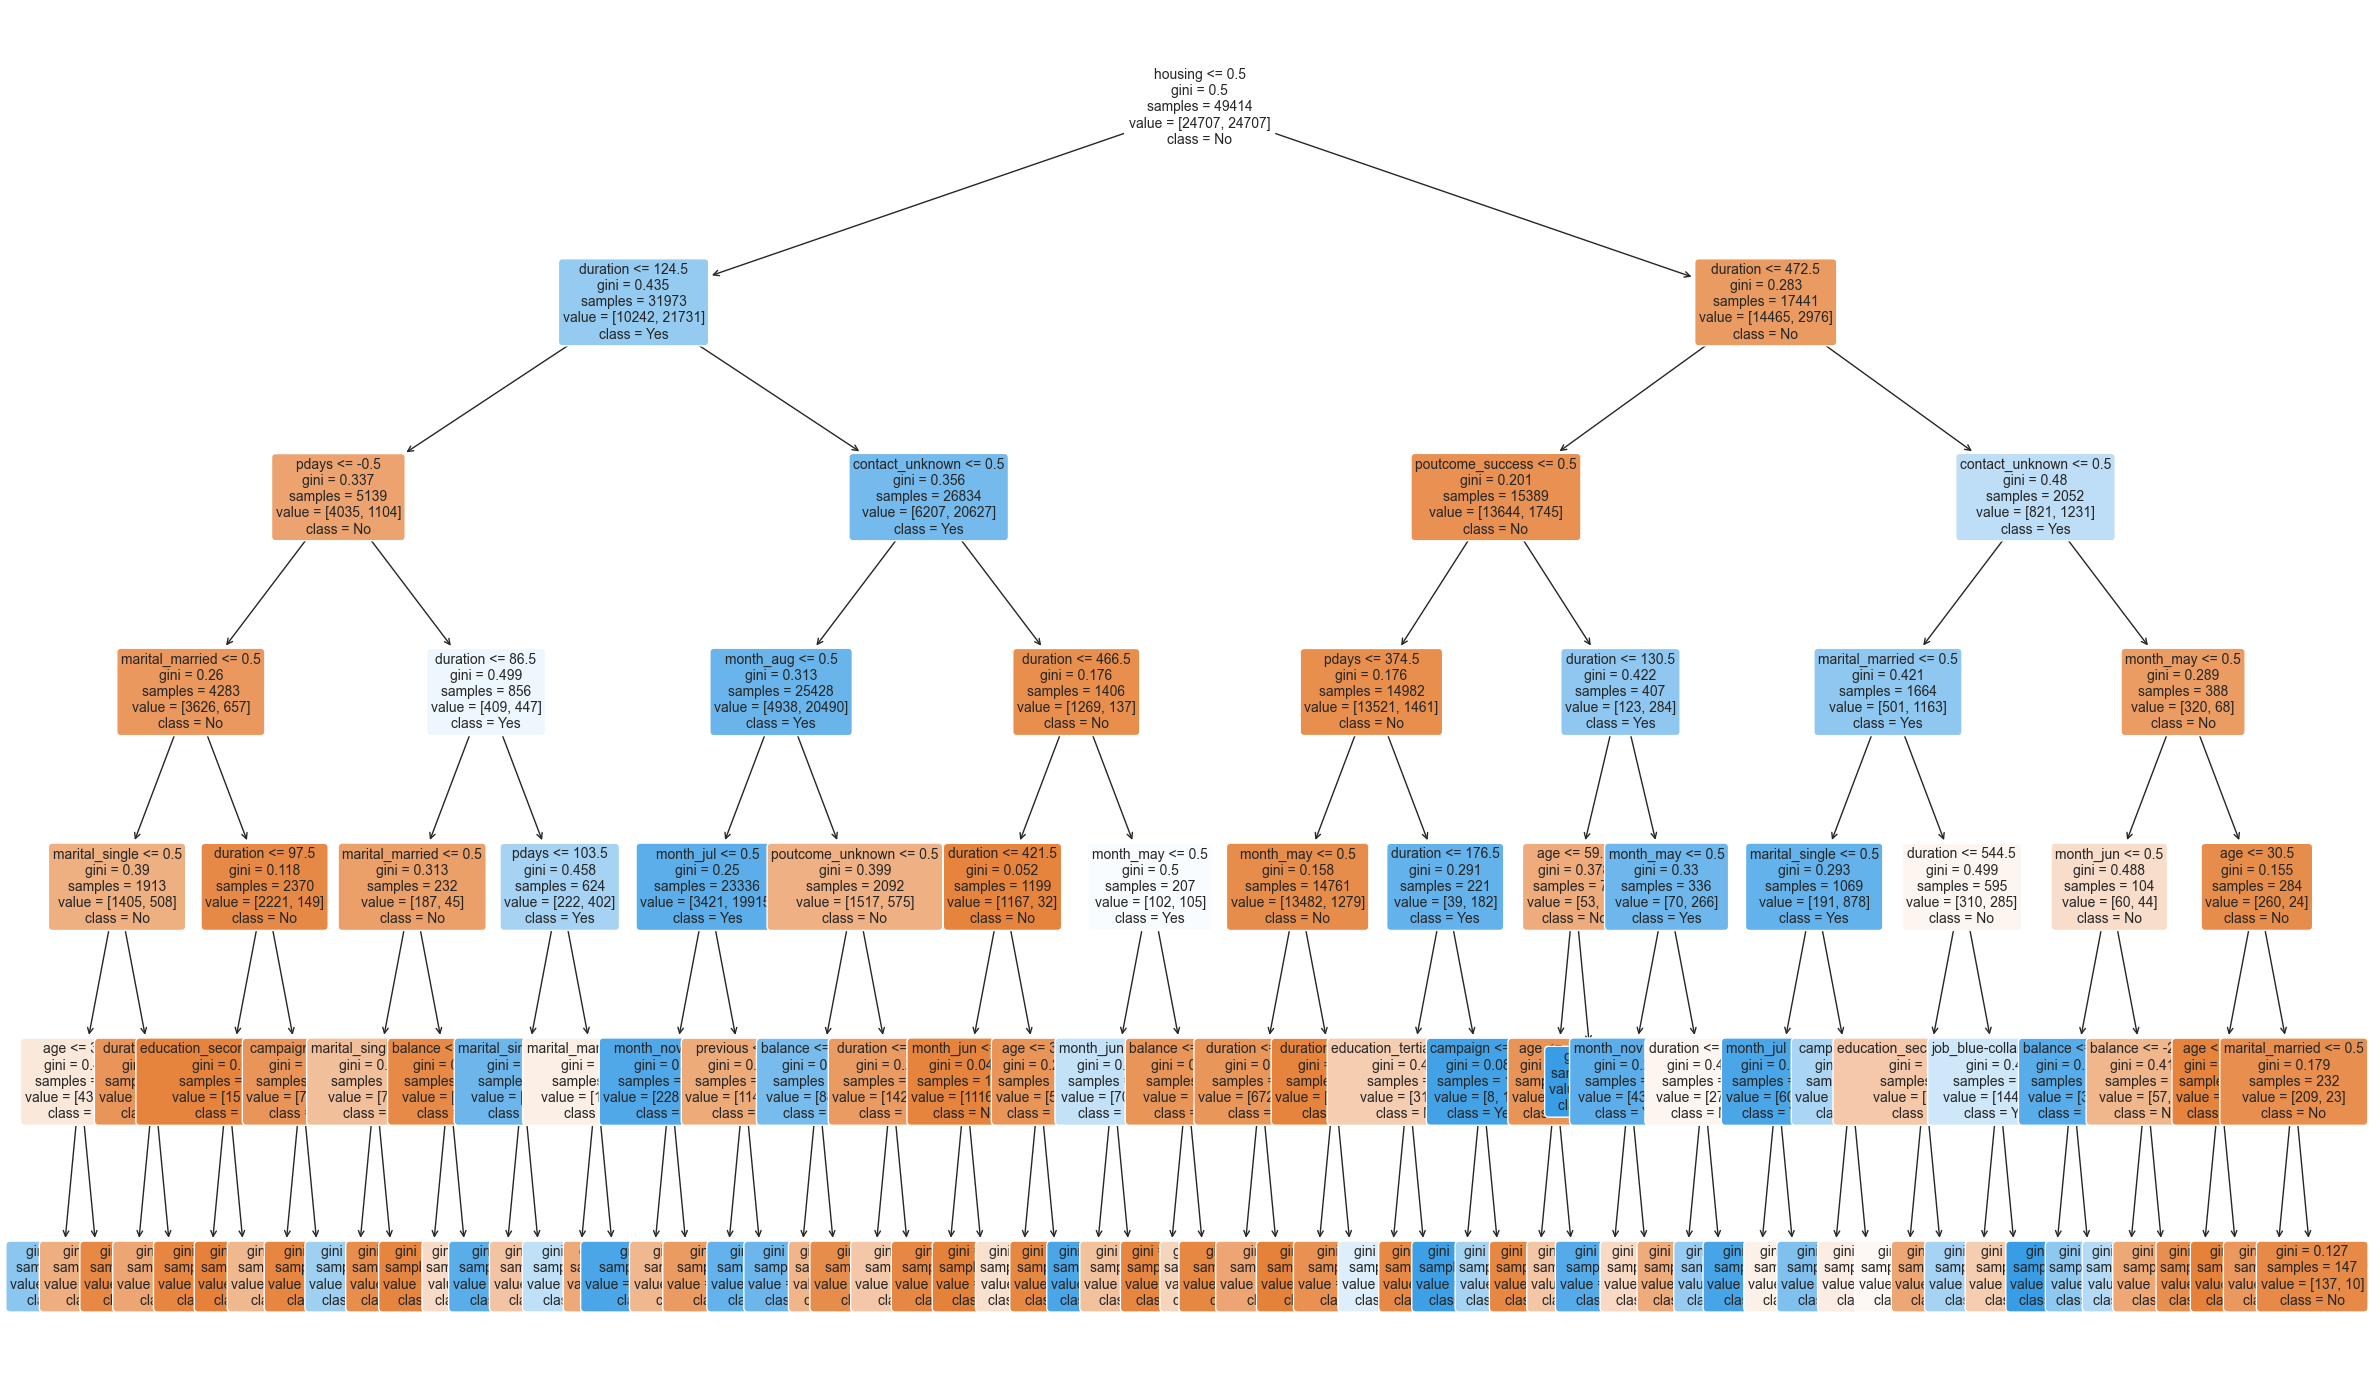

In [35]:
# Visualize the Decision Tree
plt.figure(figsize=(24, 14), dpi=100)
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validated Accuracy:", np.mean(scores))

Cross-validated Accuracy: 0.8446110105970535
